Участникам предлагается оценить вероятность того, что клиент выйдет в дефолт, основываясь на истории потребительского поведения по карточным транзакциям.

Подробное описание данных
1. train_transactions_contest/test_transactions_contest - тренировочная и тестовая выборки с транзакционными данными. Файлы в данных папках разбиты по партициям и сохранены в формате parquet. Подробное описание полей:

app_id - Идентификатор заявки. Заявки пронумерованы так, что более поздним заявкам соответствует более поздняя дата

amnt - Нормированная сумма транзакции. 0.0 - соответствует пропускам

currency - Идентификатор валюты транзакции

operation_kind - Идентификатор типа транзакции

card_type - Уникальный идентификатор типа карты

operation_type - Идентификатор типа операции по пластиковой карте

operation_type_group - Идентификатор группы карточных операций, например, дебетовая карта или кредитная карта

ecommerce_flag - Признак электронной коммерции

payment_system - Идентификатор типа платежной системы

income_flag - Признак списания/внесения денежных средств на карту

mcc - Уникальный идентификатор типа торговой точки

country - Идентификатор страны транзакции

city - Идентификатор города транзакции

mcc_category - Идентификатор категории магазина транзакции

day_of_week - День недели, когда транзакция была совершена

hour - Час, когда транзакция была совершена

days_before - Количество дней до даты выдачи кредита

weekofyear - Номер недели в году, когда транзакция была совершена

hour_diff - Количество часов с момента прошлой транзакции для данного клиента

transaction_number - Порядковый номер транзакции клиента

2. train_target.csv - целевая переменная выборки для обучения

app_id - Идентификатор заявки. заявки пронумерованы так, что более поздним заявкам соответствует более поздняя дата
product - Продукт по которому нужно принять решение, уйдет ли заявитель в дефолт или нет
flag - Целевая переменная, 1 - факт ухода в дефолт.

In [1]:
import polars as pl

# df = pl.read_csv("D:/gleb/ITMO/ML_service/data/short_df.csv")
# df

In [2]:
df = pl.read_parquet(
    "train_transactions_contest/part_004_92990_to_115175.parquet"
)

In [3]:
print(df.shape)
df

(5409527, 21)


app_id,amnt,currency,operation_kind,card_type,operation_type,operation_type_group,ecommerce_flag,payment_system,income_flag,mcc,country,city,mcc_category,day_of_week,hour,days_before,weekofyear,hour_diff,transaction_number,__index_level_0__
i32,f64,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i64,i32,i64
92990,0.387677,1,2,8,3,1,1,6,1,2,1,2,2,2,13,359,44,-1,1,417917
92990,0.387677,1,2,8,7,1,1,1,1,2,1,49,2,2,16,359,44,4,2,417918
92990,0.339712,1,1,8,1,1,1,1,1,1,1,49,1,2,21,359,44,5,3,417919
92990,0.35905,1,2,8,7,1,1,1,1,2,1,49,2,7,9,358,44,12,4,417920
92990,0.346552,1,1,5,2,1,1,2,1,5,1,2,4,7,14,358,44,5,5,417921
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
115175,0.264435,11,1,75,2,1,1,3,1,4,24,2,3,3,16,21,21,0,45,512989
115175,0.521331,11,2,75,8,1,1,3,1,2,24,2,2,5,11,16,4,115,46,512990
115175,0.31185,11,1,75,2,1,1,3,1,4,24,2,3,5,12,16,4,1,47,512991


In [4]:
target = pl.read_csv("train_target.csv")
target

app_id,product,flag
i64,i64,i64
0,3,0
1,1,0
2,1,0
3,1,0
4,1,0
…,…,…
1003045,1,0
1003047,0,0
1003048,1,0


Информация по транзакциям и таргет в разных датафреймах, смэтчим их

In [5]:
result = target.join(df, on="app_id", how="left")
result

app_id,product,flag,amnt,currency,operation_kind,card_type,operation_type,operation_type_group,ecommerce_flag,payment_system,income_flag,mcc,country,city,mcc_category,day_of_week,hour,days_before,weekofyear,hour_diff,transaction_number,__index_level_0__
i64,i64,i64,f64,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i64,i32,i64
0,3,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
1,1,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2,1,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
3,1,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
4,1,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1003045,1,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
1003047,0,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
1003048,1,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null


In [6]:
result_notna = result.drop_nans()
result_notna

app_id,product,flag,amnt,currency,operation_kind,card_type,operation_type,operation_type_group,ecommerce_flag,payment_system,income_flag,mcc,country,city,mcc_category,day_of_week,hour,days_before,weekofyear,hour_diff,transaction_number,__index_level_0__
i64,i64,i64,f64,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i64,i32,i64
92990,3,0,0.387677,1,2,8,3,1,1,6,1,2,1,2,2,2,13,359,44,-1,1,417917
92990,3,0,0.387677,1,2,8,7,1,1,1,1,2,1,49,2,2,16,359,44,4,2,417918
92990,3,0,0.339712,1,1,8,1,1,1,1,1,1,1,49,1,2,21,359,44,5,3,417919
92990,3,0,0.35905,1,2,8,7,1,1,1,1,2,1,49,2,7,9,358,44,12,4,417920
92990,3,0,0.346552,1,1,5,2,1,1,2,1,5,1,2,4,7,14,358,44,5,5,417921
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
115175,0,0,0.264435,11,1,75,2,1,1,3,1,4,24,2,3,3,16,21,21,0,45,512989
115175,0,0,0.521331,11,2,75,8,1,1,3,1,2,24,2,2,5,11,16,4,115,46,512990
115175,0,0,0.31185,11,1,75,2,1,1,3,1,4,24,2,3,5,12,16,4,1,47,512991


Проверяем правильно ли мы смэтчили их

In [7]:
df.shape[0] == result_notna.shape[0], result_notna["app_id"] == df["app_id"]


(True,
 shape: (5_409_527,)
 Series: 'app_id' [bool]
 [
 	true
 	true
 	true
 	true
 	true
 	…
 	true
 	true
 	true
 	true
 	true
 ])

### mini EDA

In [8]:
result_notna.null_count()

app_id,product,flag,amnt,currency,operation_kind,card_type,operation_type,operation_type_group,ecommerce_flag,payment_system,income_flag,mcc,country,city,mcc_category,day_of_week,hour,days_before,weekofyear,hour_diff,transaction_number,__index_level_0__
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
(
    result_notna.select(pl.col("flag").value_counts()),
    result_notna.select(pl.col("product").value_counts()),
)

(shape: (2, 1)
 ┌─────────────┐
 │ flag        │
 │ ---         │
 │ struct[2]   │
 ╞═════════════╡
 │ {0,5308767} │
 │ {1,100760}  │
 └─────────────┘,
 shape: (4, 1)
 ┌─────────────┐
 │ product     │
 │ ---         │
 │ struct[2]   │
 ╞═════════════╡
 │ {3,651997}  │
 │ {1,2494664} │
 │ {2,232887}  │
 │ {0,2029979} │
 └─────────────┘)

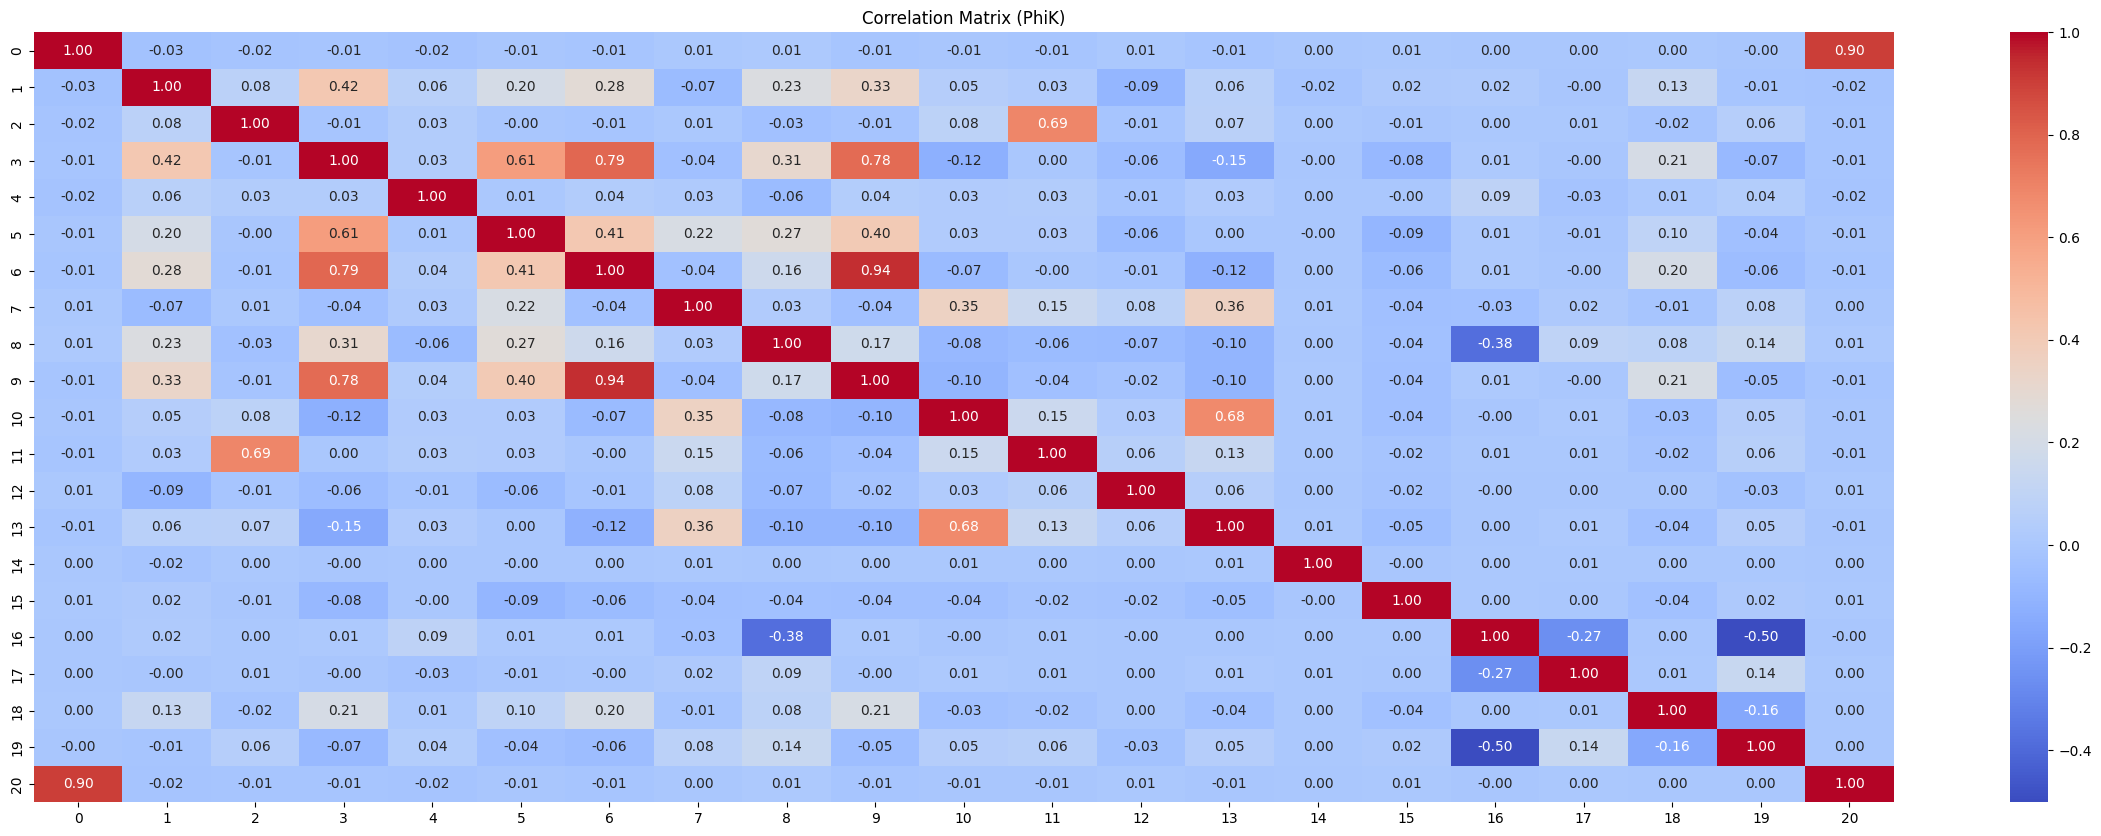

In [10]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

corr_df = result_notna.drop(["product", "flag"])

corr_df = corr_df.corr()
plt.figure(figsize=(30, 10))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (PhiK)')
plt.show()
# corr_df


app_id и index_level в целом про одно и тоже

In [11]:
result_notna.schema

Schema([('app_id', Int64),
        ('product', Int64),
        ('flag', Int64),
        ('amnt', Float64),
        ('currency', Int32),
        ('operation_kind', Int32),
        ('card_type', Int32),
        ('operation_type', Int32),
        ('operation_type_group', Int32),
        ('ecommerce_flag', Int32),
        ('payment_system', Int32),
        ('income_flag', Int32),
        ('mcc', Int32),
        ('country', Int32),
        ('city', Int32),
        ('mcc_category', Int32),
        ('day_of_week', Int32),
        ('hour', Int32),
        ('days_before', Int32),
        ('weekofyear', Int32),
        ('hour_diff', Int64),
        ('transaction_number', Int32),
        ('__index_level_0__', Int64)])

Категориальных переменных нет

In [12]:
result_notna.describe()

statistic,app_id,product,flag,amnt,currency,operation_kind,card_type,operation_type,operation_type_group,ecommerce_flag,payment_system,income_flag,mcc,country,city,mcc_category,day_of_week,hour,days_before,weekofyear,hour_diff,transaction_number,__index_level_0__
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",5.409527e6,5.409527e6,5.409527e6,5.409527e6,5.409527e6,5.409527e6,5.409527e6,5.409527e6,5.409527e6,5.409527e6,5.409527e6,5.409527e6,5.409527e6,5.409527e6,5.409527e6,5.409527e6,5.409527e6,5.409527e6,5.409527e6,5.409527e6,5.409527e6,5.409527e6,5.409527e6
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",104047.286556,0.908846,0.018626,0.367004,1.096215,1.397222,46.378396,2.53591,1.074101,1.102532,2.351638,1.076064,12.788479,1.499441,20.822789,4.348843,3.871552,14.163862,167.963171,26.485924,29.959082,275.021531,486765.147793
"""std""",6412.368276,0.944517,0.135202,0.09704,0.799894,0.889039,44.358519,2.685707,0.266376,0.30335,0.971284,0.265107,21.022865,2.678122,34.550453,4.474963,1.997156,4.78418,103.948426,14.858794,92.160489,287.830342,34914.21821
"""min""",92990.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,-1.0,1.0,397231.0
"""25%""",98642.0,0.0,0.0,0.29842,1.0,1.0,11.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,11.0,76.0,14.0,1.0,76.0,459365.0
"""50%""",103903.0,1.0,0.0,0.352732,1.0,1.0,34.0,2.0,1.0,1.0,2.0,1.0,4.0,1.0,4.0,3.0,4.0,14.0,163.0,27.0,6.0,187.0,486800.0
"""75%""",109692.0,1.0,0.0,0.426516,1.0,1.0,60.0,2.0,1.0,1.0,3.0,1.0,13.0,1.0,25.0,5.0,6.0,18.0,257.0,39.0,23.0,378.0,513865.0
"""max""",115175.0,3.0,1.0,0.929658,11.0,7.0,175.0,22.0,3.0,3.0,7.0,3.0,108.0,24.0,163.0,28.0,7.0,23.0,359.0,52.0,8122.0,3126.0,577510.0


Необходимо отнормировать признаки, тк 

Продукт: собственно кредитный продукт, тк они закодированы, можно представить что это автокредит, ипотека, потребительский кредит и тд

In [13]:
print(result_notna.columns)

['app_id', 'product', 'flag', 'amnt', 'currency', 'operation_kind', 'card_type', 'operation_type', 'operation_type_group', 'ecommerce_flag', 'payment_system', 'income_flag', 'mcc', 'country', 'city', 'mcc_category', 'day_of_week', 'hour', 'days_before', 'weekofyear', 'hour_diff', 'transaction_number', '__index_level_0__']


Отсортируем в более правильном порядке

In [14]:
new_df = result_notna.select(
    [
        "app_id",
        "amnt",
        "currency",
        "operation_kind",
        "card_type",
        "operation_type",
        "operation_type_group",
        "ecommerce_flag",
        "payment_system",
        "income_flag",
        "mcc",
        "country",
        "city",
        "mcc_category",
        "day_of_week",
        "hour",
        "days_before",
        "weekofyear",
        "hour_diff",
        "transaction_number",
        "__index_level_0__",
        "product",
        "flag",
    ]
)
new_df = new_df.drop('__index_level_0__')
new_df

app_id,amnt,currency,operation_kind,card_type,operation_type,operation_type_group,ecommerce_flag,payment_system,income_flag,mcc,country,city,mcc_category,day_of_week,hour,days_before,weekofyear,hour_diff,transaction_number,product,flag
i64,f64,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i64,i32,i64,i64
92990,0.387677,1,2,8,3,1,1,6,1,2,1,2,2,2,13,359,44,-1,1,3,0
92990,0.387677,1,2,8,7,1,1,1,1,2,1,49,2,2,16,359,44,4,2,3,0
92990,0.339712,1,1,8,1,1,1,1,1,1,1,49,1,2,21,359,44,5,3,3,0
92990,0.35905,1,2,8,7,1,1,1,1,2,1,49,2,7,9,358,44,12,4,3,0
92990,0.346552,1,1,5,2,1,1,2,1,5,1,2,4,7,14,358,44,5,5,3,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
115175,0.264435,11,1,75,2,1,1,3,1,4,24,2,3,3,16,21,21,0,45,0,0
115175,0.521331,11,2,75,8,1,1,3,1,2,24,2,2,5,11,16,4,115,46,0,0
115175,0.31185,11,1,75,2,1,1,3,1,4,24,2,3,5,12,16,4,1,47,0,0


In [15]:
x = result_notna.select()


In [16]:
from sklearn.preprocessing import StandardScaler

X, y = new_df.drop("flag"), new_df.select(pl.col("flag"))

scaler = StandardScaler()
scaler.fit(X)
scaled_x = scaler.transform(X)

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    scaled_x, y, stratify=y, random_state=42
)

## LogisticRegression

In [18]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

/mnt/d/gleb/ITMO/ML_service_test/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


logreg_pred = logreg.predict(x_test)


In [20]:
print(classification_report(y_test, logreg_pred))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99   1327192
           1       0.00      0.00      0.00     25190

    accuracy                           0.98   1352382
   macro avg       0.49      0.50      0.50   1352382
weighted avg       0.96      0.98      0.97   1352382



/mnt/d/gleb/ITMO/ML_service_test/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/d/gleb/ITMO/ML_service_test/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/d/gleb/ITMO/ML_service_test/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

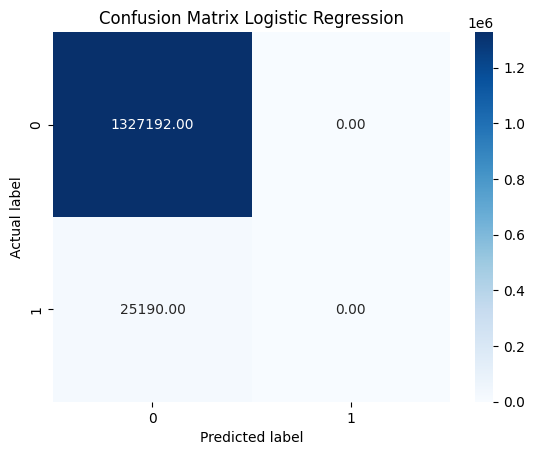

In [21]:
conf_matrix = confusion_matrix(y_test, logreg_pred)
sns.heatmap(conf_matrix, annot=True, fmt='.2f', cmap='Blues')
plt.title('Confusion Matrix Logistic Regression')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## Random Forest

In [22]:
# from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier(n_estimators=1000, max_depth=7, n_jobs=-1, random_state=42)
# rf.fit(x_train, y_train)


In [23]:
# rf_pred = rf.predict(x_test)
# print(classification_report(y_test, rf_pred))


In [24]:
# conf_matrix = confusion_matrix(y_test, rf_pred)
# sns.heatmap(conf_matrix, annot=True, fmt='.2f', cmap='Blues')
# plt.title('Confusion Matrix Catboost')
# plt.ylabel('Actual label')
# plt.xlabel('Predicted label')
# plt.show()

## CatBoost

## SVM

In [25]:
from sklearn.svm import SVC

# svm = SVC(random_state=42, kernel='poly', probability=True)  # 'rbf', 'poly', 'linear', 'sigmoid', 'precomputed'
y_train_np = y_train.to_numpy().flatten()
y_test_np = y_test.to_numpy().flatten()

svm = SVC(random_state=42, kernel='rbf', probability=False, verbose=True, max_iter=800)  # 'rbf', 'poly', 'linear', 'sigmoid', 'precomputed'
svm.fit(x_train, y_train_np)


[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 800
obj = -1597.557757, rho = -0.581913
nSV = 1600, nBSV = 1600
Total nSV = 1600


/mnt/d/gleb/ITMO/ML_service_test/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=800).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(max_iter=800, random_state=42, verbose=True)

In [26]:
svm_pred = svm.predict(x_test)
print(classification_report(y_test, svm_pred))


              precision    recall  f1-score   support

           0       0.98      0.67      0.79   1327192
           1       0.02      0.38      0.04     25190

    accuracy                           0.66   1352382
   macro avg       0.50      0.52      0.42   1352382
weighted avg       0.96      0.66      0.78   1352382



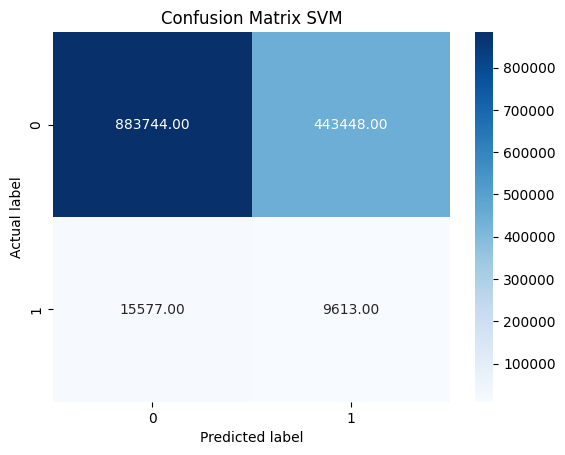

In [27]:
conf_matrix = confusion_matrix(y_test, svm_pred)
sns.heatmap(conf_matrix, annot=True, fmt='.2f', cmap='Blues')
plt.title('Confusion Matrix SVM')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [28]:
from catboost import CatBoostClassifier

# x_train_np = x_train.to_numpy()
# x_test_np = x_test.to_numpy()

# # For labels (if y_train is a single-column Polars DataFrame)

cb = CatBoostClassifier(n_estimators=1000, depth=7, random_state=42)
cb.fit(x_train, y_train_np, eval_set=(np.array(x_test), np.array(y_test)), verbose=200)


Learning rate set to 0.246683
0:	learn: 0.3368143	test: 0.3368891	best: 0.3368891 (0)	total: 263ms	remaining: 4m 23s
200:	learn: 0.0417462	test: 0.0425126	best: 0.0425126 (200)	total: 34.7s	remaining: 2m 18s
400:	learn: 0.0262035	test: 0.0270954	best: 0.0270954 (400)	total: 1m 9s	remaining: 1m 43s
600:	learn: 0.0184304	test: 0.0194283	best: 0.0194283 (600)	total: 1m 43s	remaining: 1m 8s
800:	learn: 0.0144243	test: 0.0155062	best: 0.0155062 (800)	total: 2m 18s	remaining: 34.4s
999:	learn: 0.0112633	test: 0.0124262	best: 0.0124262 (999)	total: 2m 52s	remaining: 0us

bestTest = 0.01242623774
bestIteration = 999



In [29]:
cb_pred = cb.predict(x_test)
print(classification_report(y_test_np, cb_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1327192
           1       0.99      0.83      0.90     25190

    accuracy                           1.00   1352382
   macro avg       0.99      0.91      0.95   1352382
weighted avg       1.00      1.00      1.00   1352382



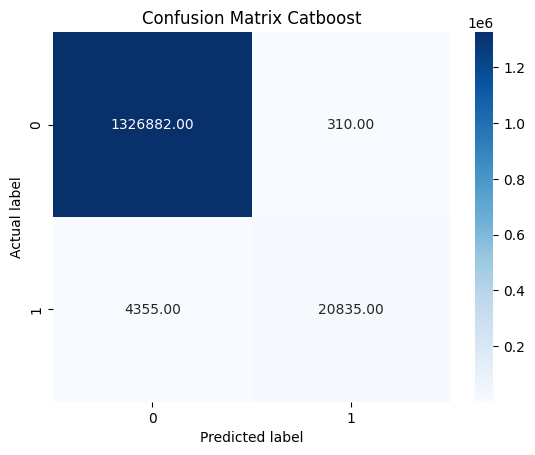

In [30]:
# from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(y_test, cb_pred)
sns.heatmap(conf_matrix, annot=True, fmt='.2f', cmap='Blues')
plt.title('Confusion Matrix Catboost')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## Сохранение моделей

In [31]:
import dill
import os
from pathlib import Path


In [32]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler



In [33]:
# def drop_index_0(df):
#     if '__index_level_0__' in df.columns:
#         df.drop(['__index_level_0__'], axis=1, inplace=True)
#     return df

# from sklearn.base import BaseEstimator, TransformerMixin

# class IndexColumnDropper(BaseEstimator, TransformerMixin):
#     def __init__(self, column_name='__index_level_0__'):
#         self.column_name = column_name
        
#     def fit(self, X, y=None):
#         return self  # No fitting needed
    
#     def transform(self, X):
#         if self.column_name in X.columns:
#             return X.drop(columns=[self.column_name])
#         return X

from sklearn.base import BaseEstimator, TransformerMixin
import polars as pl

class PolarsColumnDropper(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop: list):
        self.columns_to_drop = columns_to_drop
        
    def fit(self, X: pl.DataFrame, y=None):
        return self
    
    def transform(self, X: pl.DataFrame) -> pl.DataFrame:
        return X.drop(self.columns_to_drop)

class PolarsToNumpyConverter(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X: pl.DataFrame) -> np.ndarray:
        return X.to_numpy()

# Full pipeline
pipeline = Pipeline(steps=[
    ('drop_columns', PolarsColumnDropper(['__index_level_0__', 'flag'])),
    ('to_numpy', PolarsToNumpyConverter()),  # Convert to numpy for sklearn
    ('scaler', StandardScaler())
])
pipeline.fit(result_notna)


Pipeline(steps=[('drop_columns',
                 PolarsColumnDropper(columns_to_drop=['__index_level_0__',
                                                      'flag'])),
                ('to_numpy', PolarsToNumpyConverter()),
                ('scaler', StandardScaler())])

In [34]:
# pipeline = Pipeline(steps=[
#     ('drop_id_status', IndexColumnDropper()),
#     ('scaler', StandardScaler()),
# ])

# pipeline.fit(new_df)

In [35]:
def save_model(model, model_name, path='.'):
    if not os.path.exists(path):
        os.makedirs(path)
    with open(f'{path}/{model_name}.dill', 'wb') as f:
        dill.dump(model, f)

def load_model(model_name, path='.'):
    with open(f'{path}/{model_name}.dill', 'rb') as f:
        return dill.load(f)
    
def save_and_load_model(model, model_name):
    save_model(model, model_name)
    return load_model(model_name)


In [36]:
pipeline = save_and_load_model(pipeline, 'preprocessing_pipeline')

logreg = save_and_load_model(logreg, 'logreg')
cb = save_and_load_model(cb, 'catboost')
svm = save_and_load_model(svm, 'svm')


In [37]:
transformed_df = pipeline.transform(result_notna)

In [38]:
transformed_df

array([[-1.72436877,  2.21399248,  0.21304166, ...,  1.17870112,
        -0.33592579, -0.95202457],
       [-1.72436877,  2.21399248,  0.21304166, ...,  1.17870112,
        -0.2816726 , -0.9485503 ],
       [-1.72436877,  2.21399248, -0.28124307, ...,  1.17870112,
        -0.27082196, -0.94507603],
       ...,
       [ 1.73535174, -0.96223396, -0.56836277, ..., -1.51330756,
        -0.31422451, -0.79220818],
       [ 1.73535174, -0.96223396,  1.17373414, ..., -1.51330756,
         0.40191759, -0.78873391],
       [ 1.73535174, -0.96223396, -0.807064  , ..., -1.31140691,
         0.49957333, -0.78525964]], shape=(5409527, 21))

In [39]:
type(logreg), type(cb), type(svm)

(sklearn.linear_model._logistic.LogisticRegression,
 catboost.core.CatBoostClassifier,
 sklearn.svm._classes.SVC)

In [40]:
logreg.predict(transformed_df)

array([0, 0, 0, ..., 0, 0, 0], shape=(5409527,))

In [49]:
cb.predict(transformed_df)

array([0, 0, 0, ..., 0, 0, 0], shape=(5409527,))

In [50]:
svm.predict(transformed_df)

array([0, 0, 0, ..., 0, 0, 0], shape=(5409527,))